In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    P1 = Yfuncvec[0] 
    P2 = Yfuncvec[1]
    P3 = Yfuncvec[2]
    m1 = Yfuncvec[3]
    m2 = Yfuncvec[4]
    m3 = Yfuncvec[5]  
    
    rho = 900
    
    x1 =  P1/m1
    x2 =  P2/m2
    x3 =  P3/m3
       
    dP1dt = 0.9-1.5*(m1/rho)**0.5*x1
    dP2dt = 0.9+0.75*x1*(m1/rho)**0.5-2*x2*(m2/rho)**0.5
    dP3dt = 0.9+x2*(m2/rho)**0.5-2.5*x3*(m3/rho)**0.5
    
    dm1dt = 2-1.5*(m1/rho)**0.5
    dm2dt = 1+0.75*(m1/rho)**0.5-2*(m2/rho)**0.5
    dm3dt = 1+(m2/rho)**0.5-2.5*(m3/rho)**0.5
    
    dYfuncvecdt = [dP1dt,dP2dt,dP3dt,dm1dt,dm2dt,dm3dt] 
    return dYfuncvecdt 


In [3]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V

m0=[0,0,0,100,100,100] # Initial values for the mass salt and mass in tank 1
 
sol=ODEfun(0,m0)#Evaluates the derivatives at t=0s
print (sol)

[0.9, 0.9, 0.9, 1.5, 0.5833333333333334, 0.5]


In [4]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,4000) # Range for the independent variable t 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,m0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.11110000e-03, 1.22221000e-02, 1.23332100e-01,
       1.23443210e+00, 1.23454321e+01, 1.19945832e+02, 3.19589875e+02,
       6.18481302e+02, 1.04395555e+03, 1.64407974e+03, 2.49563142e+03,
       3.70203033e+03, 4.00000000e+03])
 t_events: None
        y: array([[0.00000000e+00, 9.99987222e-04, 1.09995539e-02, 1.10964694e-01,
        1.10758817e+00, 1.07932231e+01, 8.82313117e+01, 1.93671681e+02,
        3.07175578e+02, 4.19372278e+02, 5.22338876e+02, 6.07915011e+02,
        6.68498516e+02, 6.77399758e+02],
       [0.00000000e+00, 9.99987685e-04, 1.09996099e-02, 1.10970374e-01,
        1.10813652e+00, 1.08305661e+01, 8.67902406e+01, 1.80899803e+02,
        2.74488530e+02, 3.63880029e+02, 4.45593671e+02, 5.14343632e+02,
        5.63953717e+02, 5.71417356e+02],
       [0.00000000e+00, 9.99

In [11]:
#makes a smoother line by using more values
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,m0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
        360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
        720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
       1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
       1440., 1480., 1520., 1560., 1600., 1640., 1680., 1720., 1760.,
       1800., 1840., 1880., 1920., 1960., 2000., 2040., 2080., 2120.,
       2160., 2200., 2240., 2280., 2320., 2360., 2400., 2440., 2480.,
       2520., 2560., 2600., 2640., 2680., 2720., 2760., 2800., 2840.,
       2880., 2920., 2960., 3000., 3040., 3080., 3120., 3160., 3200.,
       3240., 3280., 3320., 3360., 3400., 3440., 3480., 3520., 3560.,
       3600., 3640., 3680., 3720., 3760., 3800., 3840., 3880., 3920.,
       3960., 4000.])
 t_events: None
        y: arr

In [12]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
X1=np.zeros(numrows)# This initializes an array that will store the analytical solution
X2=np.zeros(numrows)
X3=np.zeros(numrows)

print('   t       P1      P2      P3         X1       X2        X3       m1       m2       m3    ')
print(' (min)   (kg P)  (kg P)  (kg P)                                  (kg)     (kg)     (kg)   ')

row=0
for row in range(numrows):
    X1[row]=sol.y[0,row]/sol.y[3,row]
    X2[row]=sol.y[1,row]/sol.y[4,row]
    X3[row]=sol.y[2,row]/sol.y[5,row]
    print('{:6.2f}{:8.2f}{:8.2f}{:8.2f} {:10.3f}{:10.3f}{:10.3f}{:10.2f}{:10.2f}{:10.2f}'.format(sol.t[row],sol.y[0,row],sol.y[1,row],sol.y[2,row],X1[row],X2[row],X3[row],sol.y[3,row],sol.y[4,row],sol.y[5,row]))



        Summary of Results

   t       P1      P2      P3         X1       X2        X3       m1       m2       m3    
 (min)   (kg P)  (kg P)  (kg P)                                  (kg)     (kg)     (kg)   
  0.00    0.00    0.00    0.00      0.000     0.000     0.000    100.00    100.00    100.00
 40.00   33.12   33.21   32.82      0.210     0.270     0.275    157.33    123.17    119.18
 80.00   62.08   61.77   60.48      0.295     0.424     0.442    210.21    145.81    136.91
120.00   88.27   86.82   84.33      0.340     0.518     0.550    259.56    167.75    153.43
160.00  112.34  109.21  105.22      0.367     0.578     0.623    305.93    188.95    168.92
200.00  134.69  129.48  123.73      0.385     0.618     0.674    349.71    209.42    183.49
240.00  155.60  148.01  140.30      0.398     0.646     0.711    391.21    229.18    197.23
280.00  175.27  165.13  155.27      0.407     0.665     0.739    430.66    248.25    210.25
320.00  193.86  181.06  168.91      0.414     0.679   

Text(0, 0.5, 'Mass Fraction of Salt (kg Salt/kg total)')

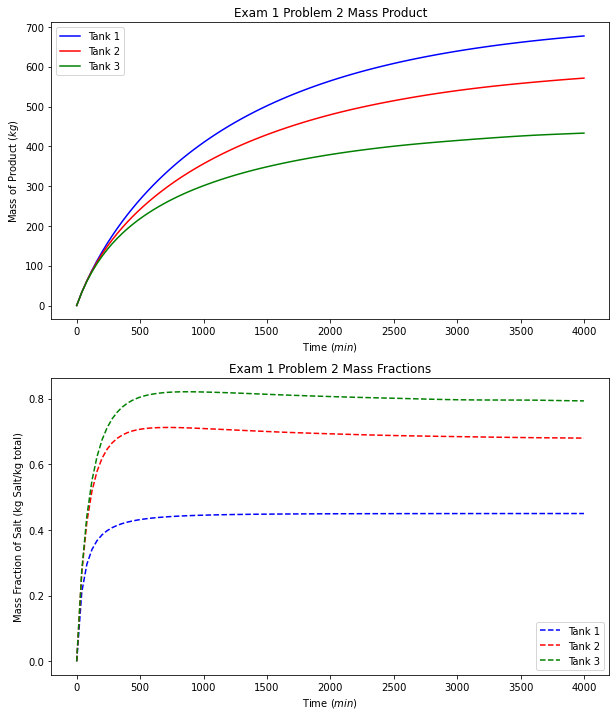

In [13]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='Tank 1')
plt.plot(sol.t,sol.y[1],'r',label='Tank 2')
plt.plot(sol.t,sol.y[2],'g',label='Tank 3')
plt.legend()
plt.title('Exam 1 Problem 2 Mass Product')
plt.xlabel('Time ($min$)')
plt.ylabel('Mass of Product ($kg$)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[0]/sol.y[3],'b',linestyle='--',label='Tank 1')
plt.plot(sol.t,sol.y[1]/sol.y[4],'r',linestyle='--',label='Tank 2')
plt.plot(sol.t,sol.y[2]/sol.y[5],'g',linestyle='--',label='Tank 3')
plt.legend()
plt.title('Exam 1 Problem 2 Mass Fractions')
plt.xlabel('Time ($min$)')
plt.ylabel('Mass Fraction of Salt (kg Salt/kg total)')

Text(0, 0.5, 'Mass of Product ($kg$)')

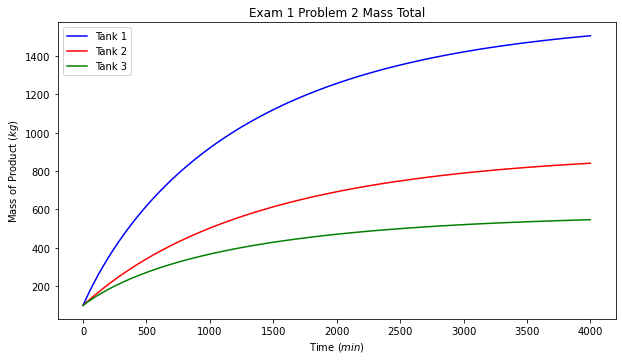

In [14]:
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[3],'b',label='Tank 1')
plt.plot(sol.t,sol.y[4],'r',label='Tank 2')
plt.plot(sol.t,sol.y[5],'g',label='Tank 3')
plt.legend()
plt.title('Exam 1 Problem 2 Mass Total')
plt.xlabel('Time ($min$)')
plt.ylabel('Mass of Product ($kg$)')
